<a href="https://colab.research.google.com/github/JanaAliCS/machine_leanring/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Assignment: Explainability in Machine Learning


In [41]:
import pandas as pd

In [42]:
loan_data = pd.read_csv('loans_data.csv')

## Section 1 – Dataset Understanding

**Instructions:** Load the dataset and inspect its structure. Summarize clear, specific observations about its shape, data types, and missing values.

Q1.1: What is the shape of the dataset (number of rows and columns)? **(2 pts)**

In [43]:
#.shape prints out (#of rows, #of cols)

print("Rows: ", loan_data.shape[0])
print("Columns: ", loan_data.shape[1])

Rows:  53916
Columns:  24


**Q1.2**: What are the primary data types of the features (numeric, categorical, etc.)? **(2 pts)**

In [44]:
#to know the datatypes we have

loan_data.dtypes

,0
id,int64
acc_now_delinq,float64
addr_state,object
annual_inc,float64
delinq_2yrs,float64
dti,float64
emp_length,object
grade,object
home_ownership,object
initial_list_status,object


In [45]:
#primary data types means: 1. numeric (int, float) 2. categorical(object, bool) 3. date/time
#we have in loan data: float64, int64, object

primary_types = loan_data.dtypes.replace({'int64':'Numeric', 'float64':'Numeric', 'object':'Categorical'})
primary_types


,0
id,Numeric
acc_now_delinq,Numeric
addr_state,Categorical
annual_inc,Numeric
delinq_2yrs,Numeric
dti,Numeric
emp_length,Categorical
grade,Categorical
home_ownership,Categorical
initial_list_status,Categorical


**Q1.3**: Are there any missing values in the dataset? If yes, mention which columns contain them and their approximate percentage. **(3 pts)**

In [46]:
loan_data.isnull().sum()

,0
id,0
acc_now_delinq,0
addr_state,0
annual_inc,0
delinq_2yrs,0
dti,0
emp_length,1625
grade,0
home_ownership,0
initial_list_status,0


In [47]:
#count those who are null -> loan_data.isnull().sum()
#then get their percentage
#loc.lamda --- > leaves those who have have any null values only

missing_info = (loan_data.isnull().sum() / len(loan_data) * 100).loc[lambda x: x > 0]
missing_info

,0
emp_length,3.013948
mths_since_last_delinq,60.991171
mths_since_last_record,90.429557


## Section 2 – Exploratory Data Analysis (EDA)

**Q2.1**: Plot the distribution of the target variable. What can you infer about class balance? **(3 pts)**

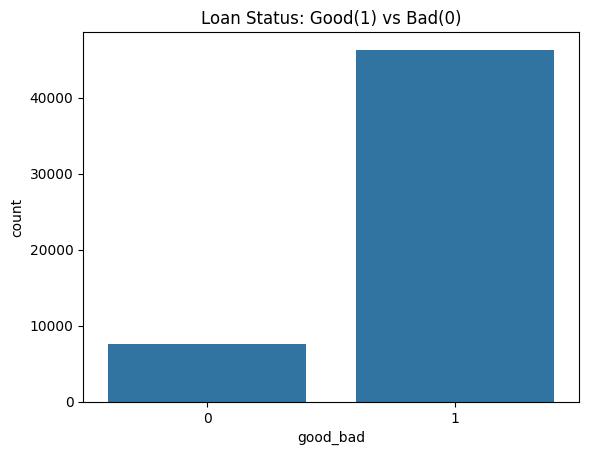

In [48]:
#the target variable is good_bad where bad loan is default (0) and good loan is non_default (1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='good_bad', data=loan_data)
plt.title('Loan Status: Good(1) vs Bad(0)')
plt.show()

It can be inferred that there is a class imbalance since more than 70% seem to not default

**Q2.2**: Plot box plots of at least two numeric variables against the target variable. **(5 pts)**

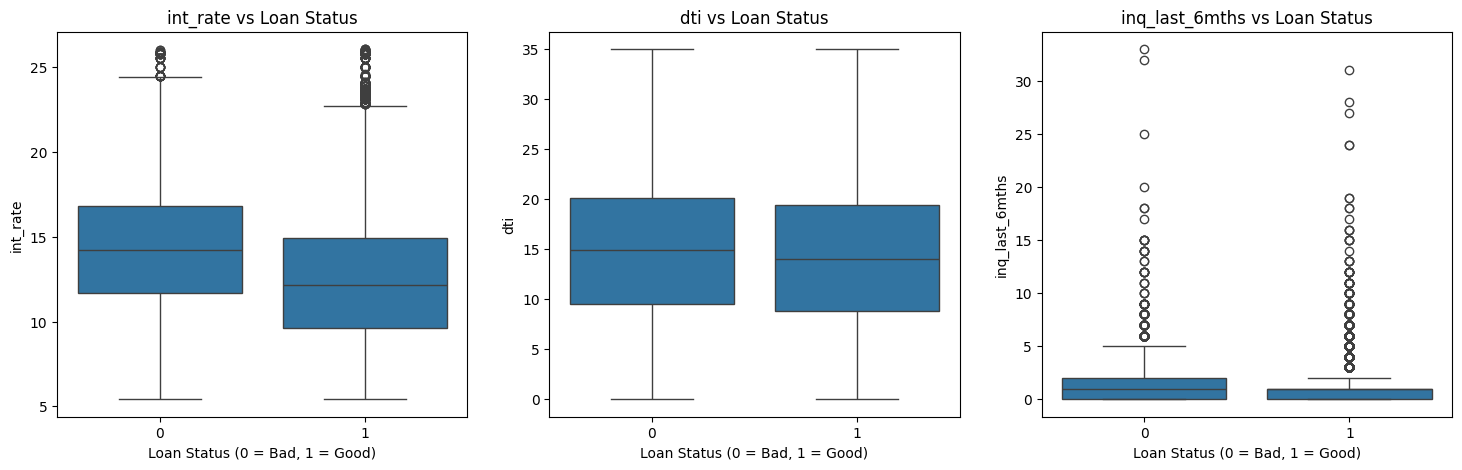

In [49]:
#1.defining two numeric continuous features
numeric_vars = ['int_rate', 'dti','inq_last_6mths']

#plotting the two boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(numeric_vars):
    sns.boxplot(x='good_bad', y=var, data=loan_data, ax=axes[i])
    axes[i].set_xlabel("Loan Status (0 = Bad, 1 = Good)")
    axes[i].set_ylabel(var)
    axes[i].set_title(f"{var} vs Loan Status")
plt.show()

## Section 3 – Weight of Evidence (WoE) & Information Value (IV)

**Q3.1**: Perform *fine classing* on all continuous variables to generate detailed initial bins. **(4 pts)**

In [50]:
#fine classing -> numeric continuous features split into detailed bins
import numpy as np

#1. continuous vars -> all those with float type
continuous_vars = loan_data.select_dtypes(include='float64')

#2. start with standard bins no. -> 10
fine_bins = {var: pd.qcut(loan_data[var], q=10, duplicates='drop') for var in continuous_vars}
fine_bins


#(not included, included]

{'acc_now_delinq': 0        (-0.001, 3.0]
 1        (-0.001, 3.0]
 2        (-0.001, 3.0]
 3        (-0.001, 3.0]
 4        (-0.001, 3.0]
              ...      
 53911    (-0.001, 3.0]
 53912    (-0.001, 3.0]
 53913    (-0.001, 3.0]
 53914    (-0.001, 3.0]
 53915    (-0.001, 3.0]
 Name: acc_now_delinq, Length: 53916, dtype: category
 Categories (1, interval[float64, right]): [(-0.001, 3.0]],
 'annual_inc': 0          (1895.999, 30000.0]
 1          (1895.999, 30000.0]
 2          (1895.999, 30000.0]
 3           (45000.0, 52000.0]
 4           (78460.5, 92040.0]
                  ...          
 53911    (120000.0, 6000000.0]
 53912       (78460.5, 92040.0]
 53913      (92040.0, 120000.0]
 53914      (92040.0, 120000.0]
 53915       (52000.0, 60000.0]
 Name: annual_inc, Length: 53916, dtype: category
 Categories (10, interval[float64, right]): [(1895.999, 30000.0] < (30000.0, 38896.0] <
                                             (38896.0, 45000.0] < (45000.0, 52000.0] < ... <
       

**Q3.2**: Apply *coarse classing* by merging adjacent fine classes and categorical feature levels that share similar WoE values across **all features**. **(18 pts)**

In [62]:
#similar WoE mean same effect on target so can be merged

target = 'good_bad'
#add the bins to the dataframe:
for var in continuous_vars:
    loan_data[var + '_bin'] = fine_bins[var]

#define categorcal vars
categorical_vars = loan_data.select_dtypes(include='object').columns

#features to be used
woe_features = [var + '_bin' for var in continuous_vars] + list(categorical_vars)

#1. function to calculate WoE
def compute_woe(data, feature, target):
  grouped = data.groupby(feature, observed=True)[target]
  stats = pd.DataFrame({
    'good': grouped.sum(),                  # gets # of good (1) in each group (bin/category)
    'bad': grouped.count() - grouped.sum()  # (total - good) = bad (0)
})
  #getting percentage of good & bad
  stats['good_pct'] = stats['good'] / stats['good'].sum()
  stats['bad_pct'] = stats['bad'] / stats['bad'].sum()

  #getting WoE for each bin
  stats['WoE'] = np.log(stats['good_pct'] / stats['bad_pct'])
  return stats['WoE']

woe_results = {}
for feature in woe_features:
    woe_results[feature] = compute_woe(loan_data, feature, target)

#2. merging bins based on woe

threshold = 0.1
merged_bins = {}
for feature, woe_values in woe_results.items():
    sorted_woe = woe_values.sort_values()
    merged_bins[feature] = [] #initial
    current_bin = []
    prev_woe = None #woe of prev group for comparison

for bin_label, woe_value in sorted_woe.items():
    if prev_woe is None or abs(woe_value - prev_woe) <= threshold:
      current_bin.append(woe_value) #if similar woe then add
    else: #move to next group and dont merge
      merged_bins[feature].append(current_bin)
      current_bin = [woe_value]
    prev_woe = woe_value

#appending the last group
merged_bins[feature].append(current_bin)



**Q3.3**: Create two separate DataFrames:
- One for **Logistic Regression**, where all features are replaced with their WoE-transformed versions.
- One for **Decision Tree**, where the original raw features are preserved.
Explain briefly why these two different representations are required for the respective models. **(3 pts)**

In [52]:
#need to transform discrete var to their WoE
discrete_vars = loan_data.select_dtypes(include='int64').columns.drop('good_bad', 'id')
for var in discrete_vars:
    woe_results[var] = compute_woe(loan_data, var, target)
woe_features = list(woe_results.keys())

#data frame for logistic regression
df_logistic = pd.DataFrame()
for feature in woe_features:
    df_logistic[feature] = loan_data[feature].map(woe_results[feature])
df_logistic[target] = loan_data[target] #the target -> good_bad -> added normally since its a label not feature

#data frame for decision tree
df_decision = loan_data.copy()
df_decision = df_decision.drop(columns=[var + '_bin' for var in continuous_vars], errors='ignore')
df_decision[target] = loan_data[target]




/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


For logistic regression, it assumes a near linear relation between the features and the label which could be achieved using the WoE since it helps get whether numerical bins or categorical data into continuous numbers that shows its relative power to the target.

For the decision tree, they do not need numerical linearlity, but actually needs the data in its raw form to preserve its variances and patterns in order to later define its own thresholds.  

## Section 4 – Model Building

Train both models:
- Logistic Regression (with WoE-transformed variables)
- Decision Tree (with raw variables)



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#logistic
X_log = df_logistic.drop(columns=[target, 'id'])
X_log.replace([np.inf, -np.inf], np.nan, inplace=True)
y_log = df_logistic[target]
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
    X_log, y_log, test_size=0.3, random_state=42
)
#to handle missing values in dicrete (since not handled earlier)
imputer = SimpleImputer(strategy='median')
X_log_train = pd.DataFrame(imputer.fit_transform(X_log_train), columns=X_log_train.columns)
X_log_test = pd.DataFrame(imputer.transform(X_log_test), columns=X_log_test.columns)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_log_train, y_log_train)

y_log_pred = log_model.predict(X_log_test)




In [54]:
#decision tree
X_tree = df_decision.drop(columns=[target, 'id'])
y_tree = df_decision[target]

# encode categorical columns
categorical_cols = X_tree.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    X_tree[col] = le.fit_transform(X_tree[col].astype(str))

X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42
)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_tree_train, y_tree_train)

y_tree_pred = tree_model.predict(X_tree_test)


**Q4.1**: Compare both models in terms of precision, recall, and accuracy. Which performs better overall? What trade-offs do you observe between the two? **(10 pts)**

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Logistic
log_acc = accuracy_score(y_log_test, y_log_pred)
log_prec = precision_score(y_log_test, y_log_pred)
log_rec = recall_score(y_log_test, y_log_pred)

# Decision
tree_acc = accuracy_score(y_tree_test, y_tree_pred)
tree_prec = precision_score(y_tree_test, y_tree_pred)
tree_rec = recall_score(y_tree_test, y_tree_pred)

# results
print("Logistic Regression:")
print(f"Accuracy: {log_acc:.4f}, Precision: {log_prec:.4f}, Recall: {log_rec:.4f}\n")

print("Decision Tree:")
print(f"Accuracy: {tree_acc:.4f}, Precision: {tree_prec:.4f}, Recall: {tree_rec:.4f}")


Logistic Regression:
Accuracy: 0.8621, Precision: 0.8633, Recall: 0.9979

Decision Tree:
Accuracy: 0.7575, Precision: 0.8701, Recall: 0.8447


Logistic Regression seems to be doing better overall as it has higher accuracy (predicts correctly overall) and higher recall (predicts most positive (good) right), meaning it seems to be not overfitting and able to generalize smoothly. While Decision Tree seems to be missing more positives (good cases) as it has lower recall. However, Decision tree seems to have a higher precision, meaning its able to capture the specific patterns better.

Thus, the key trade off here is that Logistic regression has higher recall but less precision (less likely to capture specific patterns -> may underfit), while decision tree has higher precision but lower recall -> more likely to overfit although it captures the patterns that logistic regression could miss.

## Section 5 – Explainability and Interpretation

### Part A – Logistic Regression Explainability (Scorecard)

**Q5.1**: Build a scorecard from the logistic regression model and transform coefficients into business scores within the 350–800 range. **(16 pts)**

In [66]:
#1. compute raw score

#1.1 needed standard parameters
PDO = 50 #every 50 points, prob of good doubles
BaseScore = 600 #middle reference point
BaseOdds = 20  #odds of getting good at reference point (20 good:1 bad)

#convert logistic output to scores
Factor = PDO / np.log(2)
Offset = BaseScore - Factor * np.log(BaseOdds)

#1.2 setting coeffs and intercept
coefficients = pd.Series(log_model.coef_[0], index=X_log_train.columns)
intercept = log_model.intercept_[0]

#1.3 compute points for each variable (per WoE feature)
scorecard = pd.DataFrame({
    'Variable': coefficients.index,
    'Coefficient': coefficients.values,
    'Score': coefficients.values * Factor #i removed the standard - bec the model is predicting not defaulting (good) and not the opposite (standard)
})

base_score = Offset - (intercept * Factor)

#2. transform raw score to business score (350-800)
min_score = 350
max_score = 800

scorecard['Business_Score'] = min_score + (scorecard['Score'] - scorecard['Score'].min()) * (max_score - min_score) / (scorecard['Score'].max() - scorecard['Score'].min())
scorecard['Business_Score'] = scorecard['Business_Score'].round(0).clip(min_score, max_score).astype(int)

#create score card
print(f"Base Score (Intercept contribution): {round(base_score, 2)}\n")
print("Scorecard:")
print(scorecard)


Base Score (Intercept contribution): 254.02

Scorecard:
                           Variable  Coefficient      Score  Business_Score
0                acc_now_delinq_bin     0.000000   0.000000             417
1                    annual_inc_bin     1.190988  85.911607             800
2                   delinq_2yrs_bin     0.015704   1.132834             422
3                           dti_bin     0.558650  40.298050             597
4                inq_last_6mths_bin     0.676645  48.809624             635
5                      int_rate_bin     0.571818  41.247971             601
6   mths_since_earliest_cr_line_bin     0.350505  25.283591             530
7        mths_since_last_delinq_bin     0.616791  44.492066             615
8        mths_since_last_record_bin    -0.052563  -3.791602             400
9                      open_acc_bin    -0.208744 -15.057719             350
10                      pub_rec_bin     0.000000   0.000000             417
11                    total_acc_

**Q5.2**: Interpret three model coefficients. What does a positive versus negative sign indicate about credit risk? **(6 pts)**

According to the logistic model, a positive coefficient would mean a low credit risk (safe borrower) and also a high score, while a negative sign would mean a high credit risk and low score.

Coefficients' Interpretation:

For annual_inc_bin (coeff:1.19): means that a higher annual income increases the odds of being good (safer borrower) because of the positive and high coefficent. For dti_bin (coeff:0.55), it means that lower debt-to-income increases the odds of being a good borrower (however since it has a lower coeff than annual_inc_bin then it means that it has a weaker effect).
For open_acc_bin (coeff:-0.2087), it means that having too many open accounts is associated with a high risk of being a bad borrower (defaulting).




### Part B – Decision Tree Explainability



**Q6.1**: Visualize the decision tree. Which features appear at the top, and why do you think they are important? **(10 pts)**

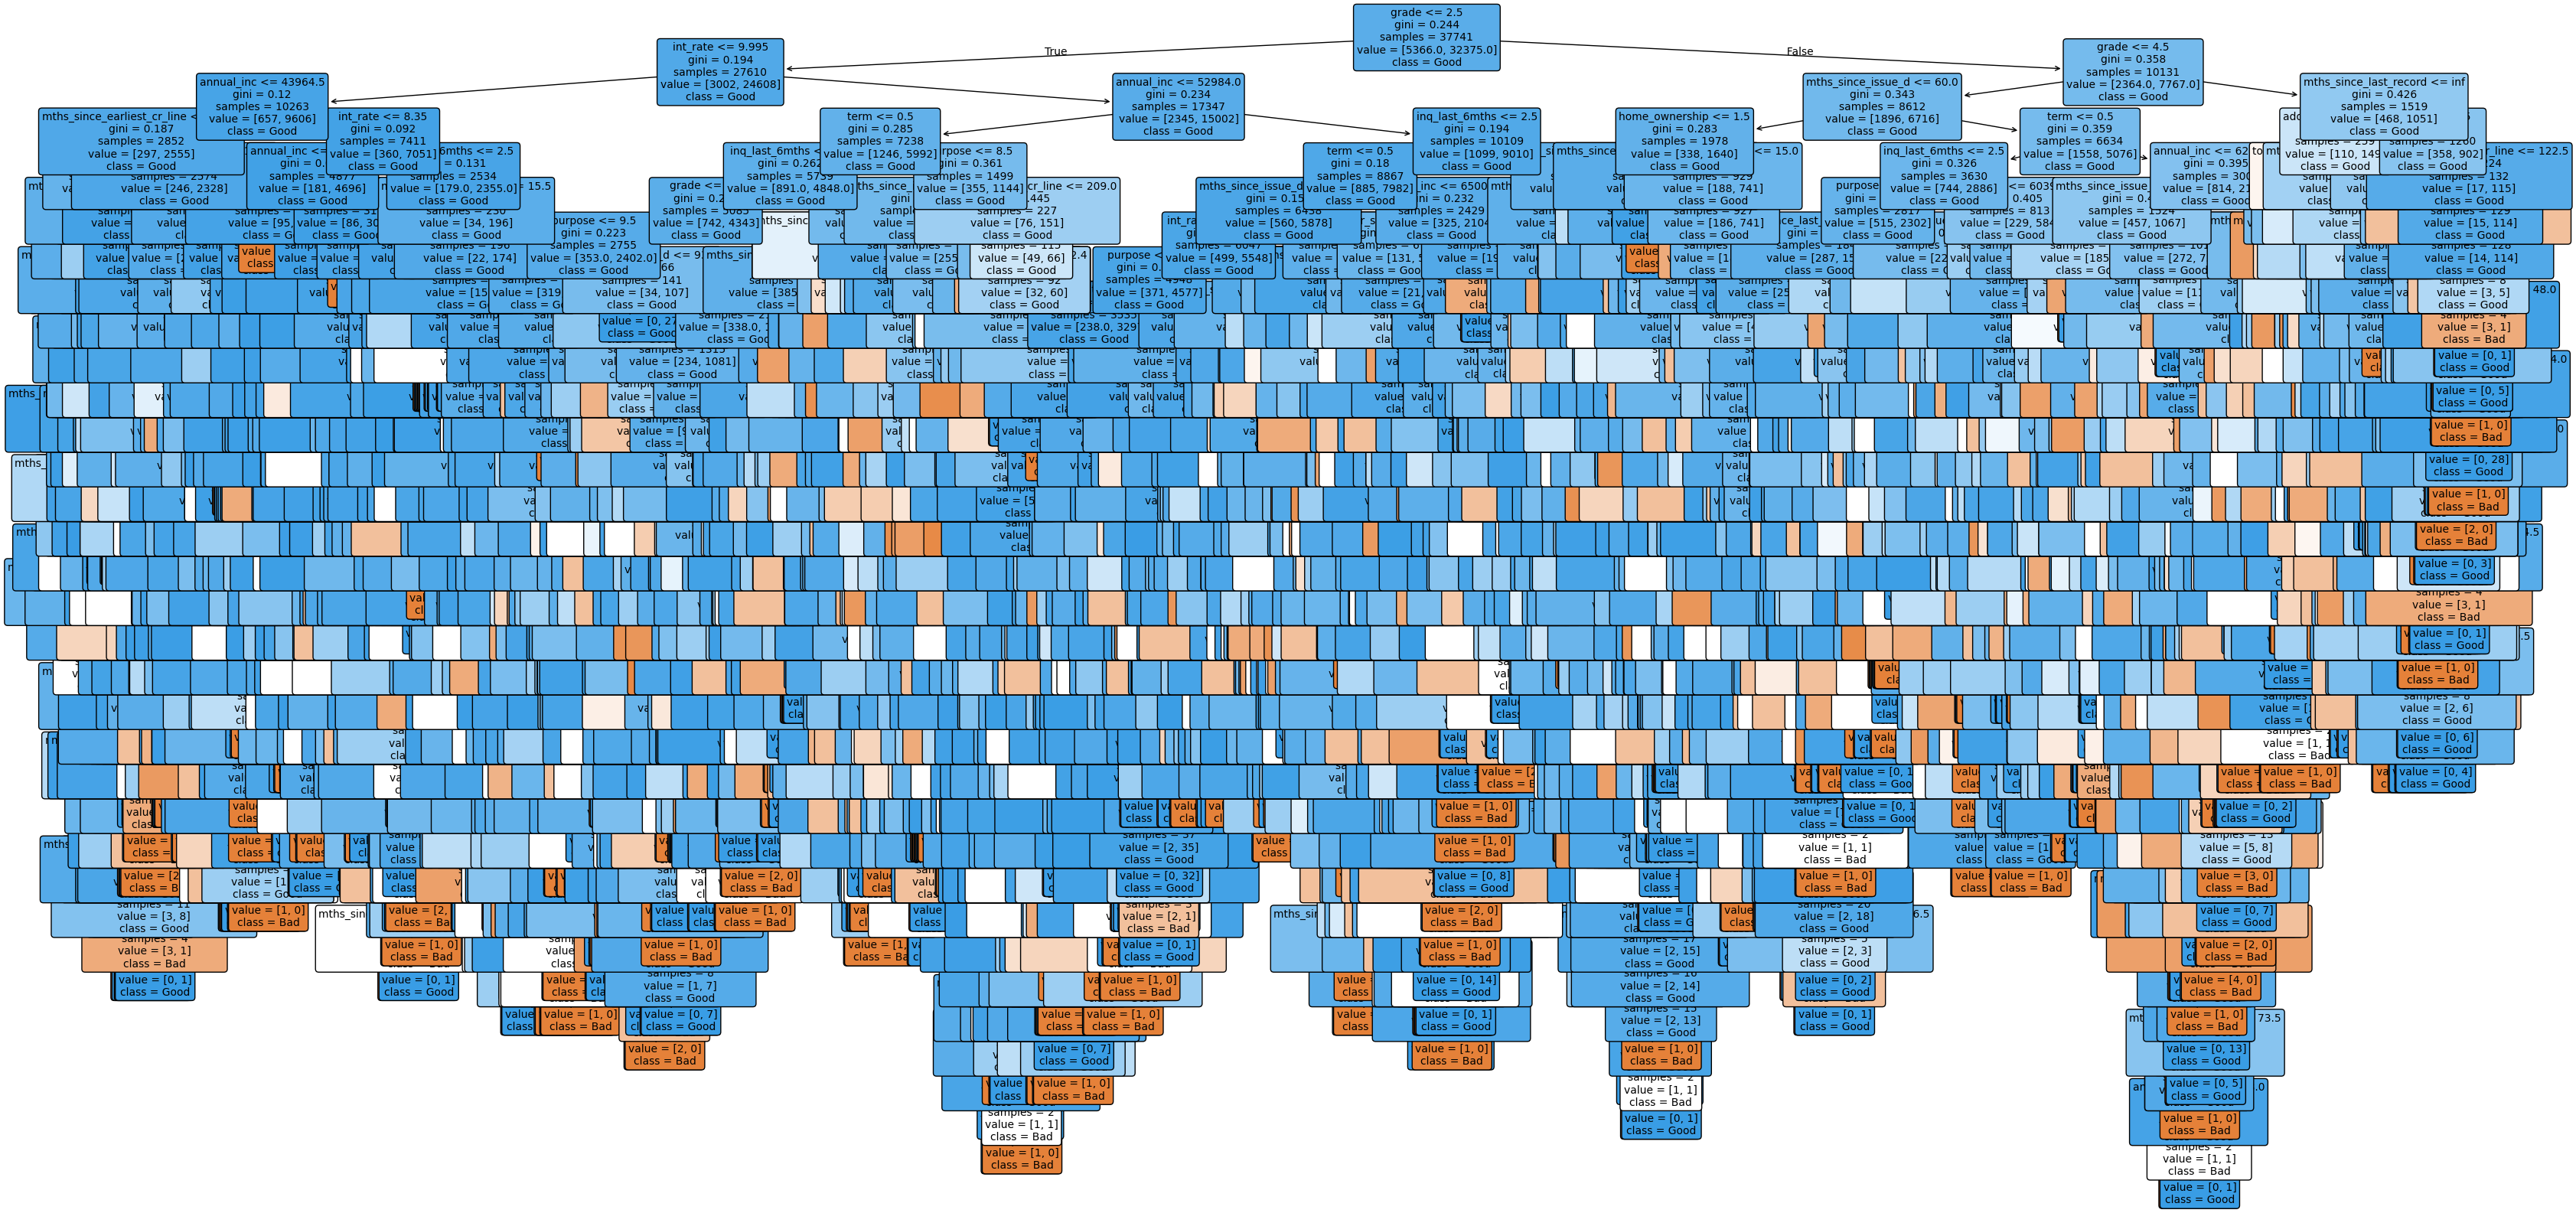

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(
    tree_model,
    feature_names=X_tree_train.columns,
    class_names=['Bad', 'Good'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

**Q6.2**: Choose one leaf node (final decision). Write out the full rule path leading to that node and describe what kind of borrower it represents. **(5 pts)**

In [74]:
from sklearn.tree import _tree


#1st get index of a leaf node
leaf_nodes = [i for i in range(tree_model.tree_.node_count)
              if tree_model.tree_.children_left[i] == _tree.TREE_LEAF]
leaf_node_index = leaf_nodes[0]

#2nd trace path
def trace_path(tree, leaf_id, node_id=0, path=None):
    if path is None:
        path = []
    if node_id == leaf_id: #if it meets the leaf node i selected
        return path

    # stopping if not right leaf
    if tree.children_left[node_id] == _tree.TREE_LEAF and tree.children_right[node_id] == _tree.TREE_LEAF:
        return None

    # traversing left child
    if tree.children_left[node_id] != _tree.TREE_LEAF:
        left_path = path + [(tree.feature[node_id], "<=", tree.threshold[node_id])]
        result = trace_path(tree, leaf_id, tree.children_left[node_id], left_path)
        if result is not None:
            return result

    # traversing right child
    if tree.children_right[node_id] != _tree.TREE_LEAF:
        right_path = path + [(tree.feature[node_id], ">", tree.threshold[node_id])]
        result = trace_path(tree, leaf_id, tree.children_right[node_id], right_path)
        if result is not None:
            return result

    return None

# 3. get path to the selected leaf
tree_ = tree_model.tree_
leaf_path = trace_path(tree_, leaf_node_index)

# 4. print path nicely
for feature, op, threshold in leaf_path:
    print(f"Feature '{X_tree.columns[feature]}' {op} {threshold}")




Feature 'grade' <= 2.5
Feature 'int_rate' <= 9.994999885559082
Feature 'annual_inc' <= 43964.5
Feature 'mths_since_earliest_cr_line' <= 152.5
Feature 'annual_inc' <= 13600.0
Feature 'int_rate' <= 8.630000114440918


The above path represents a borrower who has a low grade for borrowing, low-to-medium income, low interest rates, and relatively short credit history. So its possbily someone new to the credit but with a favorable interest rate. This leaf node would have a majority vote to determie its credit worthiness (good/bad).

**Q6.3**: Compare the simplicity of the decision tree explanation to the numeric interpretability of the logistic model. Which is easier to justify to regulators and why? **(3 pts)**

Logistic regression's scorecard seems easier to understand at a first glance especially for non-technical audience; however, explaining the logic behind and how the log-odds and WoE are computed and transformed is harder when compared to the decision tree as it just requires to follow the path to realize the logic behind the decision so easier for non-technical audience most probably.

### Part C – SHAP Explainability

SHAP (SHapley Additive exPlanations) is a popular method for explaining machine learning model predictions. It assigns each feature a value that represents its contribution to a specific prediction, helping us understand how and why the model made certain decisions.

SHAP combines ideas from game theory and explainable AI to provide both global and local interpretations.

You are encouraged to read more about SHAP to deepen your understanding before completing this section.

Recommended starting point: [SHAP documentation](https://shap.readthedocs.io/en/latest/)


**Q7.1**: Generate and display a SHAP summary plot for the decision tree. Which three variables contribute most globally, and why might that be? **(4 pts)**

 97%|=================== | 31279/32350 [00:39<00:01]       

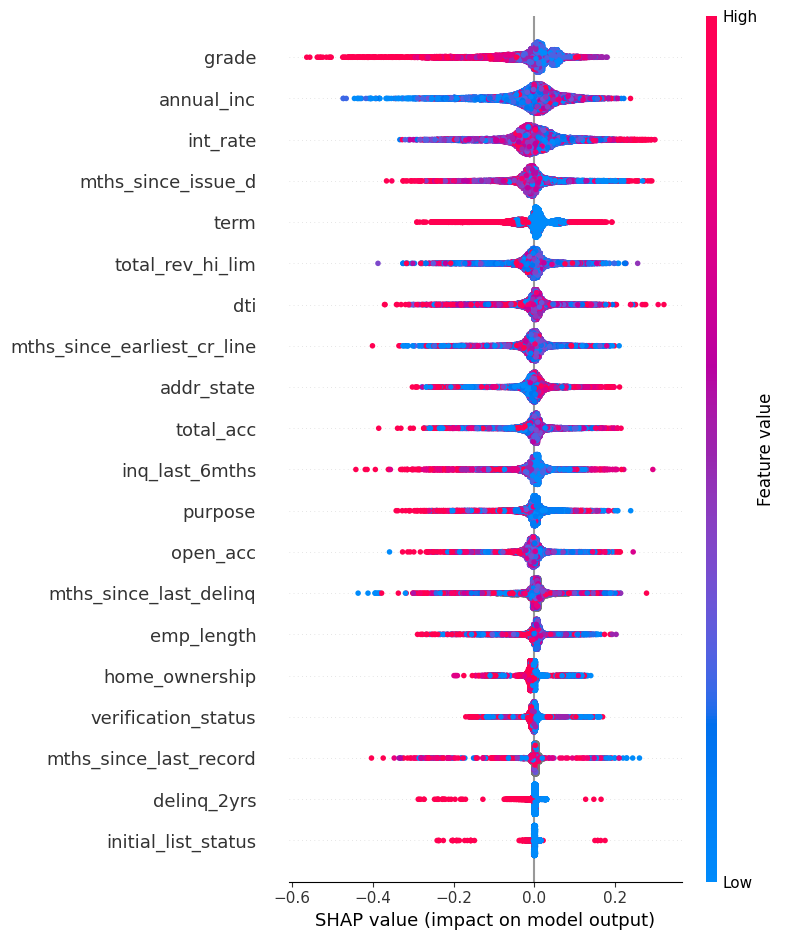

In [90]:
!pip install shap --quiet
import shap

explainer = shap.Explainer(tree_model, X_tree_train)

shap_values_tree = explainer(X_tree_test)


shap_vals_pos = shap_values_tree.values[:, :, 1]

#summary plot that shows direction and magnititude
shap.summary_plot(shap_vals_pos, X_tree_test)


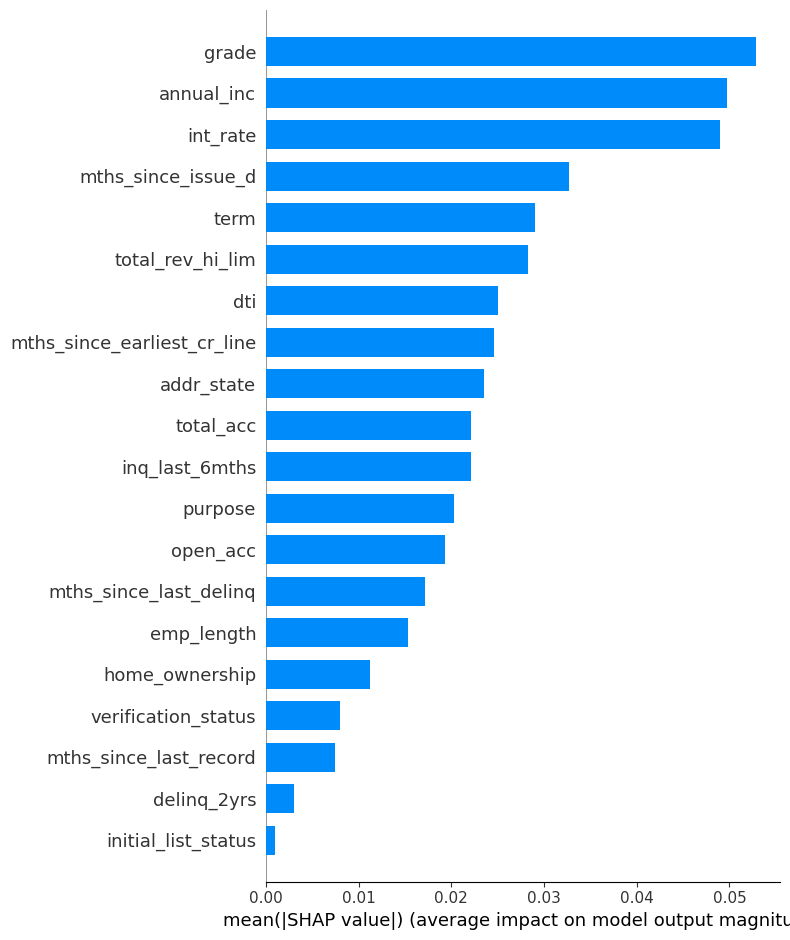

In [91]:
#summary plot that shows magnititude globally to get the 3 features most imp
shap.summary_plot(shap_vals_pos, X_tree_test, plot_type="bar")

Its apparent from both the graphs of the SHAP summary plot that yhe 3 features that contribute most globally are: grade, annual_inc , and int_rate. Grade predicts how likely a person is to repay based on their past experience which is a very important indicative to predict their behavior in defaulting / or not. Annual income is also a good predictive since we have already captured from nthe logistic regression that it has the largest effect in all features as a person who has a higher annual income than another one, he is more likely to pay their loans than the other person with lower annual income. Lastly, the interest rate paid on loan is generally correlated with someone's ability to pay because a lower interest rate would mean a lower loan to pay and thus a higher ability to pay.

**Q7.2**: For one test instance, display SHAP force plots for both models. Which model’s explanation aligns better with business intuition? **(4 pts)**

In [93]:
shap.initjs()

#decision tree model
i = 0
shap.plots.force(
    explainer.expected_value[1],
    shap_values_tree.values[i, :, 1],
    X_tree_test.iloc[i, :],
    show=True
)

In [95]:
shap.initjs()


#logistic regression

explainer_log = shap.Explainer(log_model, X_log_train)
shap_values_log = explainer_log(X_log_test)
i = 0
shap.plots.force(
    explainer_log.expected_value,
    shap_values_log.values[i, :],
    X_log_test.iloc[i, :],
    show=True
)

The decision tree model explanation aligns better with business intuition because it uses actual feature values while logistic regression model explanationrelies on binned and abstracted features, making it less transparent and harder to link to the real world (for instance the 1.45 (log-odds) from above needs to be transfromed to a probability in order to be able to interpret it). However, both models are dircetionslly aligning with business intuition. That is, for decision tree, that instance which is good (not defaulting) is because the person has high income, long credit history, short term are affecting it more than the negatives and thus less credit risk.

**Q7.3**: In your own words, explain the difference between *global* and *local* interpretability in the context of SHAP. **(2 pts)**

Global interpretability means that we see how important a features is to the whole instances and driving their results. However, local interpretability means we see for a single instance what were the driving features and how big their effect were in getting a result.